# Import libraries

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score

from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

from mlxtend.plotting import plot_confusion_matrix

# import warnings
# warnings.filterwarnings("ignore")
# %matplotlib inline

# Load data

In [71]:
# iris = load_iris()
# iris.keys()
df = pd.read_csv('/content/drive/MyDrive/TE/Temp/Dsdba/Iris.csv')
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [72]:
x = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y = df[["Species"]]

In [73]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [74]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


# Basic stats

In [75]:
x.shape, y.shape

((150, 4), (150, 1))

In [76]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [77]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Species  150 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


In [78]:
x.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data preparation

In [79]:
scaler = StandardScaler()
# x = scaler.fit_transform(x.values)
x = x.values
# df

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y.values, test_size=0.2, random_state=42)

In [81]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

# Model building

In [82]:
model = GaussianNB()

In [83]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [84]:
y_pred = model.predict(x_test)

# Evalutation

In [85]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


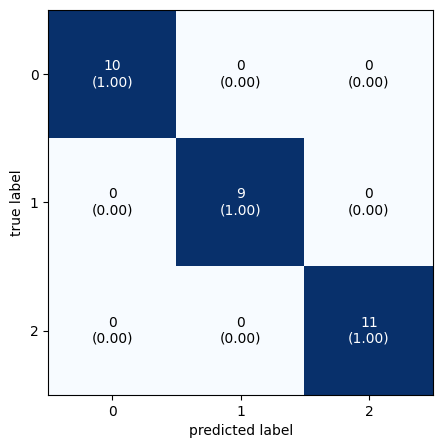

In [86]:
plot_confusion_matrix(conf_mat=cm, figsize=(5,5), show_normed=True)
# plot_confusion_matrix(conf_mat=cm, figsize=(5,5), show_normed=True)
plt.show()

([<matplotlib.axis.YTick at 0x79bc6e49e740>,
 [Text(0, 0, 'Iris-setosa'),
  Text(0, 1, 'Iris-versicolor'),
  Text(0, 2, 'Iris-virginica')])

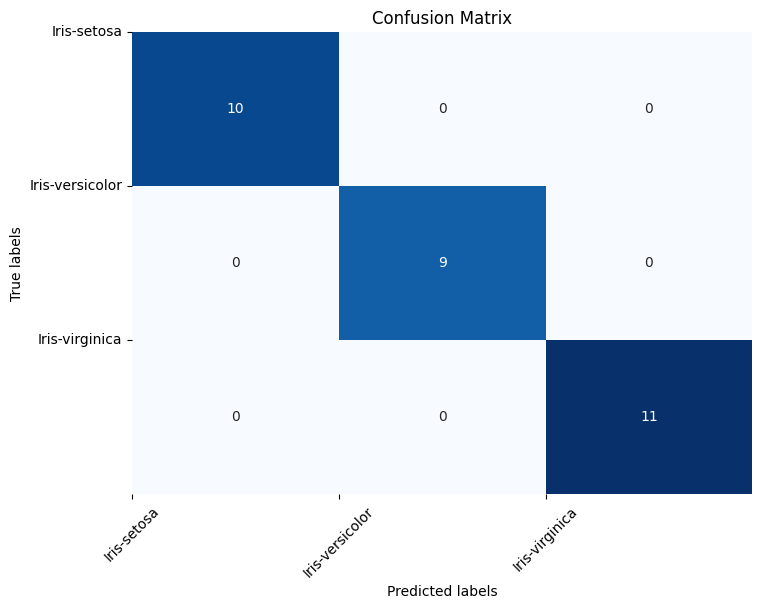

In [95]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

# Set labels, title, and axis ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(df['Species'].unique())), df['Species'].unique(), rotation=45)
plt.yticks(np.arange(len(df['Species'].unique())), df['Species'].unique(), rotation=0)

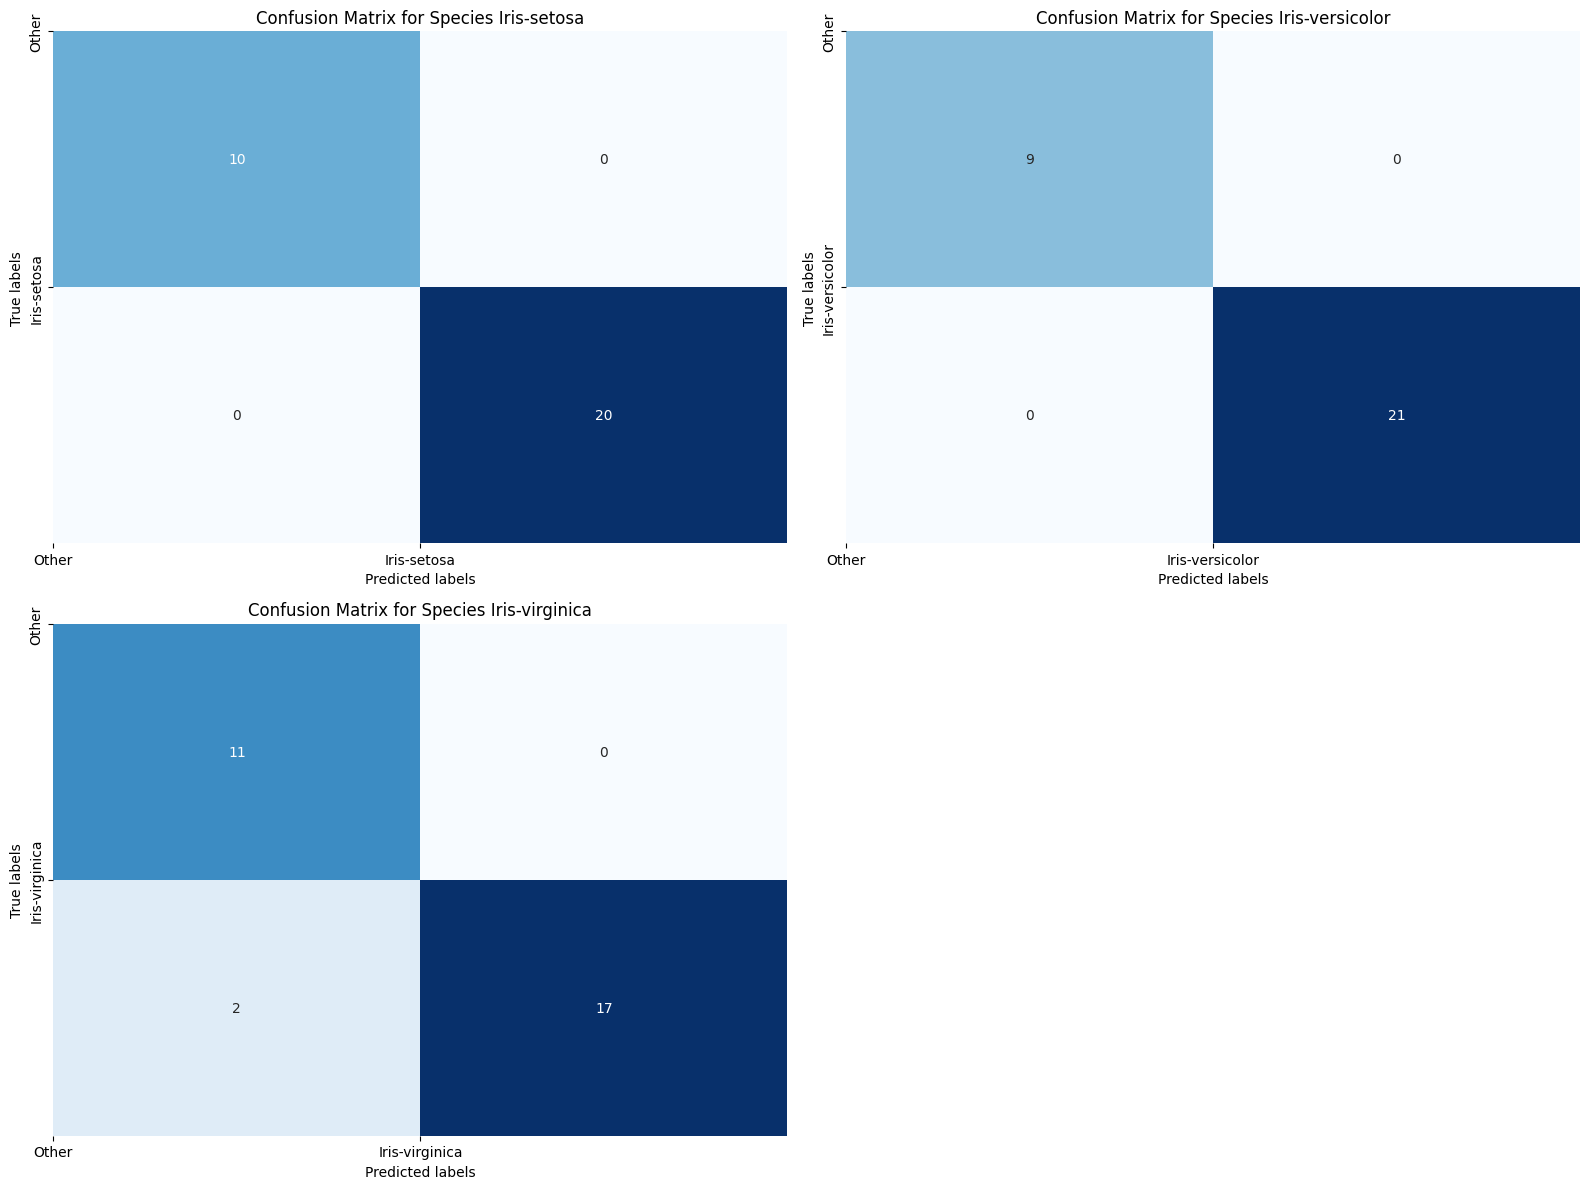

In [96]:
X = df.drop(columns=['Id', 'Species'])
y = df['Species']

# Get unique species
species = df['Species'].unique()

# Initialize a dictionary to store confusion matrices for each species
confusion_matrices = {}

# Initialize and train a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Iterate over each species
for specie in species:
    # Binary classification: current species vs all other species combined
    y_binary = np.where(y == specie, specie, 'Other')

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

    # Train the Naive Bayes classifier
    nb_classifier.fit(X_train, y_train)

    # Predict the target variable on the testing set
    y_pred = nb_classifier.predict(X_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Store the confusion matrix in the dictionary
    confusion_matrices[specie] = cm

# Plot the confusion matrices
plt.figure(figsize=(16, 12))

for i, (specie, cm) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for Species {specie}')
    plt.xticks(np.arange(2), ['Other', specie])
    plt.yticks(np.arange(2), ['Other', specie])

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for Species Iris-virginica')

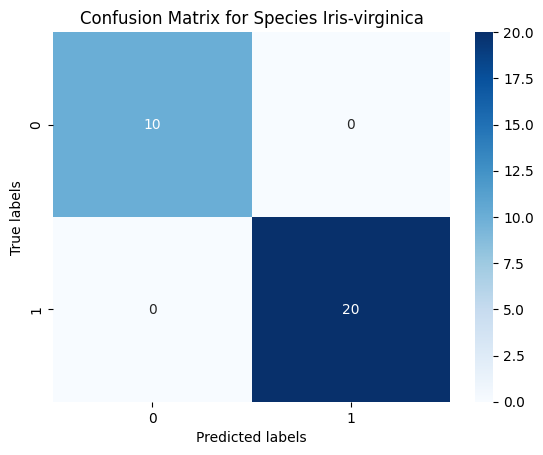

In [102]:
cm = [[10 ,0],
      [0 ,20]]
sns.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix for Species {specie}')
# plt.xticks(np.arange(2), ['Other', specie])
# plt.yticks(np.arange(2), ['Other', specie])



https://www.v7labs.com/blog/confusion-matrix-guide#:~:text=the%20negative%20class.-,Confusion%20Matrix%20for%20Multiple%20Classes,output%20distribution%20by%20the%20classifier.&text=Exemplar%20test%20set%20of%20a%20multi%2Dclass%20dataset.


In [87]:
print(f"TP value is {cm[0,0]}")
print(f"TN value is {cm[1,1] + cm[2,2]}")
print(f"FP value is {cm[0,1] + cm[0,2]}")
print(f"FN value is {cm[1,0] + cm[2,0]}")

TP value is 10
TN value is 20
FP value is 0
FN value is 0


In [88]:
print(f"Accuracy score is {accuracy_score(y_test, y_pred)}")

Accuracy score is 1.0


In [89]:
print(f"Error rate is {1 - accuracy_score(y_test, y_pred)}")

Error rate is 0.0


In [90]:
print(f"Precision score is {precision_score(y_test, y_pred, average='macro')}")

Precision score is 1.0


In [91]:
print(f"Recall score is {recall_score(y_test, y_pred, average='macro')}")

Recall score is 1.0


In [92]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

